<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis Antonio Barriga Adame, Santiago Cataño Besson.

**Fecha:** 06 de Marzo del 2023.

**Expediente** : 730512, 727527 .
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Luis168735/ProyectoConjunto_CB_Santiago_LA_Barriga

# Tarea 4: Clase 9 y 10

#### Tarea clase 9
Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)**
 
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

### Tarea clase10
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

### Ejercicio 1: (enunciado) Transcribirlo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps 
from math import factorial as fac

Código de solución estudiante 1: Luis

In [ ]:
# Código de solución estudiante 1
num_uni = np.random.rand


Código de solución estudiante 2: Santiago

Ejercicio 1

<ipython-input-3-eb0fd83b8f13>:16: RuntimeWarning: divide by zero encountered in true_divide
  pdf = 2 / (np.pi * np.sqrt(x) * np.sqrt(1 - x))


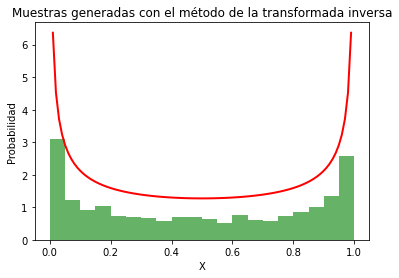

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de distribución acumulada inversa
def invCDF(y):
    return np.sin(np.pi * y / 2) ** 2

# Generar 1000 muestras aleatorias distribuidas según la función dada
samples = [invCDF(np.random.random()) for i in range(1000)]

# Graficar el histograma de las muestras generadas
plt.hist(samples, bins=20, density=True, alpha=0.6, color='g')

# Graficar la función de densidad de probabilidad
x = np.linspace(0, 1, 100)
pdf = 2 / (np.pi * np.sqrt(x) * np.sqrt(1 - x))
plt.plot(x, pdf, 'r', lw=2)

plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.title('Muestras generadas con el método de la transformada inversa')

plt.show()


Podemos ver que el histograma de las muestras generadas se asemeja bastante bien a la función de densidad de probabilidad, lo que sugiere que el método de la transformada inversa ha generado muestras aleatorias que siguen la distribución dada de manera efectiva.

Ejercicio 2

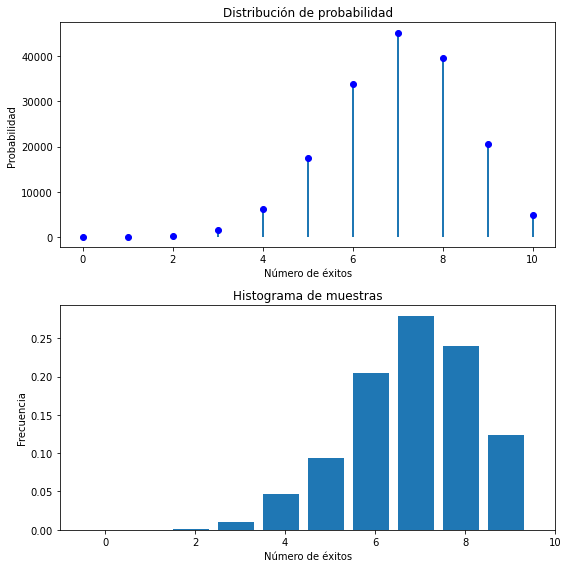

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def binomial(n, p):
    # Calculamos las probabilidades de éxito para cada i
    prob = [1] * (n + 1)
    for i in range(n):
        prob[i+1] = prob[i] * (n-i) * p / (i+1) / (1-p)
    return prob

def inverse_transform_sampling(dist, n_samples):
    # Generamos la distribución acumulada
    cum_dist = np.cumsum(dist)
    
    # Normalizamos la distribución acumulada para que esté entre 0 y 1
    cum_dist = cum_dist / cum_dist[-1]
    
    # Generamos una muestra uniforme
    u = np.random.random(n_samples)
    
    # Encontramos el valor correspondiente en la distribución inversa
    return np.searchsorted(cum_dist, u)

# Definimos los parámetros de la distribución binomial
n = 10
p = 0.7

# Generamos la distribución de probabilidad y la acumulada
x = np.arange(n+1)
prob = binomial(n, p)
cum_prob = np.cumsum(prob)

# Generamos las muestras usando el método de la transformada inversa
n_samples = 1000
samples = inverse_transform_sampling(prob, n_samples)

# Graficamos la distribución de probabilidad
fig, axs = plt.subplots(2, 1, figsize=(8,8))
axs[0].plot(x, prob, 'bo')
axs[0].vlines(x, 0, prob, lw=2)
axs[0].set_title('Distribución de probabilidad')
axs[0].set_xlabel('Número de éxitos')
axs[0].set_ylabel('Probabilidad')

# Graficamos el histograma de las muestras
axs[1].hist(samples, bins=x-0.5, density=True, width=0.8, align='mid')
axs[1].set_title('Histograma de muestras')
axs[1].set_xlabel('Número de éxitos')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Podemos ver cómo se asemejan, por lo que la cumple con el propósito de generación variable aleatoria discreta. 

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........